In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('dataset csv\\bank-additional-full.csv', sep = ';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
dataset.isnull().values.any()

False

In [6]:
column_with_uknown = []
for column in dataset.columns:
    if 'unknown' in dataset[column].values:
        column_with_uknown.append(column)

column_with_uknown


C:\Users\guido\AppData\Local\Temp\ipykernel_12920\146321031.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in dataset[column].values:


['job', 'marital', 'education', 'default', 'housing', 'loan']

In [7]:
dataset.drop(dataset[dataset['job'] == 'unknown'].index)
dataset.drop(dataset[dataset['marital'] == 'unknown'].index)
dataset.drop(dataset[dataset['education'] == 'unknown'].index)
dataset.drop(dataset[dataset['default'] == 'unknown'].index)
dataset.drop(dataset[dataset['housing'] == 'unknown'].index)
dataset.drop(dataset[dataset['loan'] == 'unknown'].index)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
for col in dataset.columns:
    print(col)
    print(dataset[col].describe())
    print()

age
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

job
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

marital
count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

education
count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

default
count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

housing
count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

loan
count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

contact
count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

month
count     41188
uni

In [9]:
import matplotlib.pyplot as plt

def plot_attributes(data):
    plt.figure()
    dataset.boxplot(data)
    plt.show()

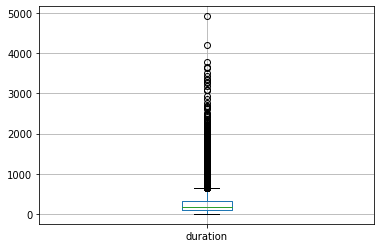

In [10]:
plot_attributes('duration')


In [11]:
dataset.drop(dataset[dataset['duration'] > 3800].index, inplace=True)

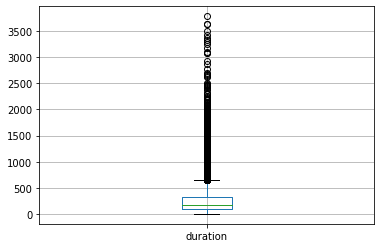

In [12]:
plot_attributes('duration')

In [13]:
from sklearn.preprocessing import LabelEncoder

# Handling categoric data
newdata = dict()
for key in dataset.keys():
    if dataset[key].dtypes == 'object':
        le = LabelEncoder()
        le.fit(dataset[key])
        newdata[key] = le.transform(dataset[key])
    else:
        newdata[key] = dataset[key]

new_ds = pd.DataFrame.from_dict(newdata, orient='columns', dtype=None)
new_ds.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

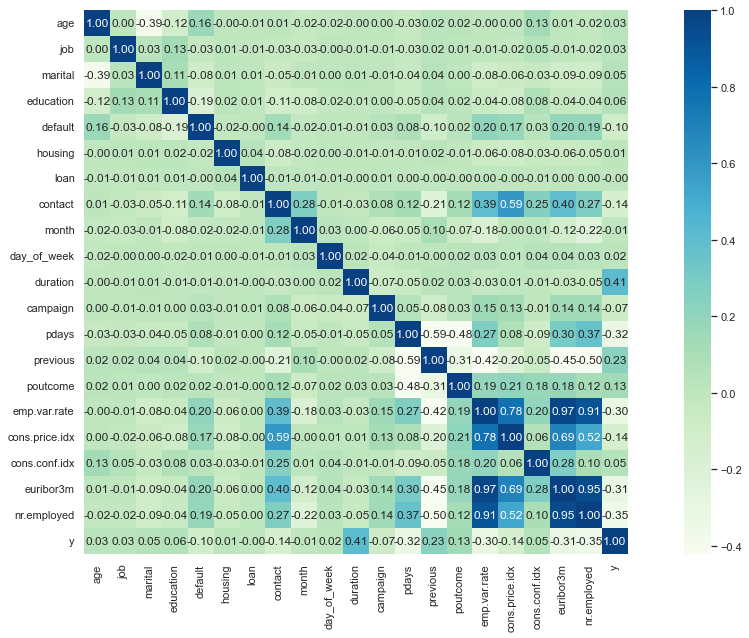

In [14]:
import seaborn as sns

# correlation matrix
mc = new_ds.corr()
sns.set(rc = {'figure.figsize': (20,10)})
sns.heatmap(mc, annot=True, vmax=1, square=True, fmt='.2f', cmap='GnBu', robust=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split


X = new_ds.iloc[:, :-1]
y = new_ds.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [18]:
from collections import Counter
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_new_train, y_train = oversample.fit_resample(X_train, y_train)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

gnb = GaussianNB()
logreg = LogisticRegression(solver="lbfgs")
kneig = KNeighborsClassifier(3)
randfor = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
dectree = DecisionTreeClassifier(max_depth=5)

ensemble_classifier = VotingClassifier(
    estimators=[('gnb', gnb), ('logreg', logreg), ('kneig', kneig), ("randfor", randfor), ("dectree", dectree)],
    voting='hard'
)

# Fit the ensemble regressor
ensemble_classifier.fit(X_new_train, y_train)

# Predict with the ensemble regressor
y_pred = ensemble_classifier.predict(X_test)

c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

def metrics_scores(clf):
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=1)
    print(clf, ': Accuracy score: ', round(accuracy_score(y_test, y_pred), 4), "Precision",
                round(pr, 4), ' Recall ', round(rc, 4), ' FScore ', round(fs, 4))
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    report = classification_report(y_pred, y_test, zero_division=1)
    print(report)
    print()

In [21]:
classifiers = ensemble_classifier.named_estimators_

# Print the individual classifiers
for name, classifier in classifiers.items():
    print(f"Classifier Name: {name}")
    metrics_scores(classifier)
    print("---------------------------------")

Classifier Name: gnb
0.857801877630301
Accuracy: 0.86
GaussianNB() : Accuracy score:  0.8578 Precision 0.704  Recall  0.8433  FScore  0.7415
[[9443 1511]
 [ 246 1156]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9689
           1       0.82      0.43      0.57      2667

    accuracy                           0.86     12356
   macro avg       0.84      0.70      0.74     12356
weighted avg       0.85      0.86      0.84     12356


---------------------------------
Classifier Name: logreg
0.857801877630301
Accuracy: 0.86
LogisticRegression() : Accuracy score:  0.8578 Precision 0.704  Recall  0.8433  FScore  0.7415
[[9443 1511]
 [ 246 1156]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9689
           1       0.82      0.43      0.57      2667

    accuracy                           0.86     12356
   macro avg       0.84      0.70      0.74     12356
weighted avg       

In [22]:
metrics_scores(ensemble_classifier)

0.857801877630301
Accuracy: 0.86
VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('logreg', LogisticRegression()),
                             ('kneig', KNeighborsClassifier(n_neighbors=3)),
                             ('randfor',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=1,
                                                     n_estimators=10)),
                             ('dectree', DecisionTreeClassifier(max_depth=5))]) : Accuracy score:  0.8578 Precision 0.704  Recall  0.8433  FScore  0.7415
[[9443 1511]
 [ 246 1156]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9689
           1       0.82      0.43      0.57      2667

    accuracy                           0.86     12356
   macro avg       0.84      0.70      0.74     12356
weighted avg       0.85      0.86      0.84     12356




In [23]:
from sklearn.model_selection import KFold, cross_validate

def k_folds(clf):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['accuracy', 'precision', 'recall']
    results = cross_validate(clf,X,y,scoring=scoring,cv=cv, n_jobs=-1)
    print("Accuracy: {:.4f}".format(results['test_accuracy'].mean()))
    print("Recall: {:.4f}".format(results['test_recall'].mean()))
    print("Precision: {:.4f}".format(results['test_precision'].mean()))

In [24]:
classifiers = ensemble_classifier.named_estimators_

# Print the individual classifiers
for name, classifier in classifiers.items():
    print(f"Classifier Name: {name}")
    k_folds(classifier)
    print("---------------------------------")

Classifier Name: gnb
Accuracy: 0.8462
Recall: 0.6002
Precision: 0.3831
---------------------------------
Classifier Name: logreg
Accuracy: 0.9078
Recall: 0.3874
Precision: 0.6533
---------------------------------
Classifier Name: kneig
Accuracy: 0.9000
Recall: 0.4807
Precision: 0.5659
---------------------------------
Classifier Name: randfor
Accuracy: 0.8957
Recall: 0.1069
Precision: 0.7721
---------------------------------
Classifier Name: dectree
Accuracy: 0.9142
Recall: 0.5266
Precision: 0.6472
---------------------------------


In [25]:
k_folds(ensemble_classifier)

Accuracy: 0.9105
Recall: 0.4230
Precision: 0.6615
